In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/data/FS_plots/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=100,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()

[KX,KY]=l.read_lattice()

# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX100.npy
reading lattice from... ./Lattices/KgridY100.npy
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 2.393002986907959


Machine arg is, CH1


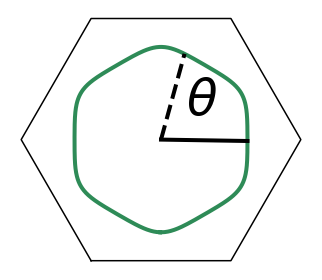

In [4]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################


import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=plot(KxFS,KyFS,c='seagreen', lw=4)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')

x=np.linspace(0,1,100)

point1=int(NpointsFS_pre/12 +2*NpointsFS_pre/3 +8)
# plt.scatter([KxFS[point1]],[KyFS[point1]])
plt.plot(KxFS[point1]*x,KyFS[point1]*x, lw=4, c='k')

point2=int(NpointsFS_pre/2 +30)

# plt.scatter([KxFS[point2]],[KyFS[point2]])
plt.plot(KxFS[point2]*x,KyFS[point2]*x, lw=4, c='k', ls='--')


plt.text(0.75,0.75,r'$\theta$', size=50)
plt.tight_layout()
plt.savefig("imgs/pap_fig_comp1.png", dpi=400)


In [5]:
import numpy as np
import Lattice
import StructureFactor
import Dispersion
import matplotlib.pyplot as plt
import time
import sys
import concurrent.futures
import functools
import gc
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot
from scipy.optimize import curve_fit

Machine='CH1'
save=True
Npoints_diff=1000
latt_dif=Lattice.TriangLattice(Npoints_diff, save,Machine)

Machine arg is, CH1


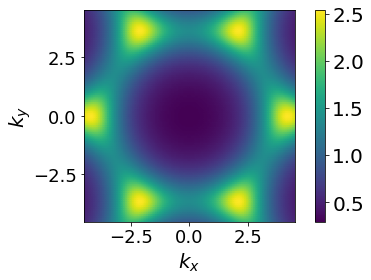

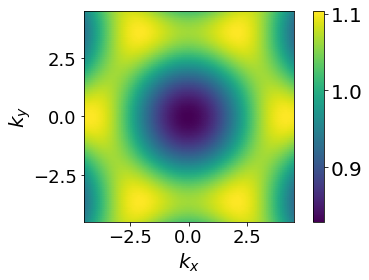

In [8]:
ST=[]

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
TTT=np.array([1,10])
for i,T in enumerate(TTT):
    fig,ax=plt.subplots(1,1)
    SS=StructureFactor.StructureFac_fit_F(T)
    im=ax.scatter(x,y,c=SS.Static_SF( x,y),s=4)
    ax.set_xlim([-4.5,4.5])
    ax.set_ylim([-4.5,4.5])
    ax.set_xlabel(r"$k_x$",size=20)
    ax.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=4)
    
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('imgs/static_T'+str(T)+'.png',dpi=400)

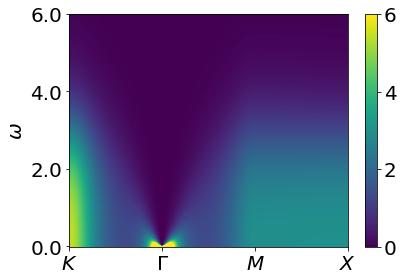

In [7]:
ST=[]

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
TTT=np.array([1])
for i,T in enumerate(TTT):
    fig,ax=plt.subplots(1,1)
    SS=StructureFactor.StructureFac_fit_F(T)
    SS.momentum_cut_high_symmetry_path(l, 200,100 )